In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
bank=pd.read_csv("C:\\Users\\DELL\\Downloads\\bank-full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.drop(["contact","poutcome"],axis=1,inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [5]:
bank=bank.replace("unknown",np.nan)

In [6]:
bank.isnull().sum()

age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

In [7]:
bank1=bank.dropna()

In [8]:
bank1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [9]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no


In [10]:
bank1.columns
number=LabelEncoder()
bank1['job']=number.fit_transform(bank1['job'])
bank1['education']=number.fit_transform(bank1['education'])
bank1['month']=number.fit_transform(bank1['month'])
bank1['job'].value_counts()
bank1['education'].value_counts()
bank1['month'].value_counts()
         

<ipython-input-10-dae6450e0598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['job']=number.fit_transform(bank1['job'])
<ipython-input-10-dae6450e0598>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['education']=number.fit_transform(bank1['education'])
<ipython-input-10-dae6450e0598>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

8     13192
5      6601
1      6037
6      4980
9      3842
0      2820
3      2533
4      1318
10      690
11      532
7       448
2       200
Name: month, dtype: int64

In [11]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,married,2,no,2143,yes,no,5,8,261,1,-1,0,no
1,44,9,single,1,no,29,yes,no,5,8,151,1,-1,0,no
2,33,2,married,1,no,2,yes,yes,5,8,76,1,-1,0,no
5,35,4,married,2,no,231,yes,no,5,8,139,1,-1,0,no
6,28,4,single,2,no,447,yes,yes,5,8,217,1,-1,0,no


In [12]:
bank2=pd.get_dummies(bank1,columns=["marital","default","housing","loan","y"],drop_first=True)

In [13]:
bank2.head()

,age,job,education,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,default_yes,housing_yes,loan_yes,y_yes
0,58,4,2,2143,5,8,261,1,-1,0,1,0,0,1,0,0
1,44,9,1,29,5,8,151,1,-1,0,0,1,0,1,0,0
2,33,2,1,2,5,8,76,1,-1,0,1,0,0,1,1,0
5,35,4,2,231,5,8,139,1,-1,0,1,0,0,1,0,0
6,28,4,2,447,5,8,217,1,-1,0,0,1,0,1,1,0


In [14]:
X = bank2.iloc[:,0:15]
Y = bank2.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(X,test_size=0.3)
train_y,test_y=train_test_split(Y,test_size=0.3)

In [16]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [18]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})


In [19]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
5,0,0
6,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [20]:
cm = confusion_matrix(Y,y_pred)
print (cm)

[[37498   674]
 [ 4121   900]]


In [21]:
(37498+900)/(37498+900+4121+674)*100

88.89866413539231

In [22]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38172
           1       0.57      0.18      0.27      5021

    accuracy                           0.89     43193
   macro avg       0.74      0.58      0.61     43193
weighted avg       0.86      0.89      0.86     43193



In [23]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

Text(0, 0.5, 'True Positive Rate')

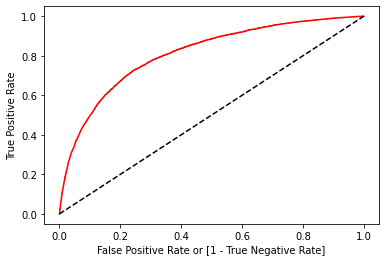

In [24]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [25]:
auc

0.5807951203081815

In [26]:
df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["fpr"]>=0.25] 



,fpr,tpr,cutoff
4772,0.250367,0.730930,1.217988e-01
4773,0.250367,0.731129,1.217925e-01
4774,0.250472,0.731129,1.217805e-01
4775,0.250472,0.731328,1.217769e-01
4776,0.250707,0.731328,1.217329e-01
...,...,...,...
7284,0.994394,0.999602,6.075274e-05
7285,0.994394,0.999801,5.341584e-05
7286,0.997642,0.999801,6.009833e-06
7287,0.997642,1.000000,5.440129e-06


In [27]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred.loc[prob>0.15,"pred"]=1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,0
5,0,0
6,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [28]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new
print(classification_report(new_pred.actual,new_pred.pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     38172
           1       0.32      0.65      0.43      5021

    accuracy                           0.80     43193
   macro avg       0.63      0.73      0.65     43193
weighted avg       0.87      0.80      0.82     43193



In [29]:
auc = roc_auc_score(new_pred.actual,new_pred.pred)
auc

0.7329802094119922

In [30]:
classifier=LogisticRegression().fit(train_x,train_y)
y_pred=classifier.predict(test_x)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
y_pred_df= pd.DataFrame({'actual': test_y,
                         'predicted':y_pred})
y_pred_df

,actual,predicted
3004,1,0
42878,0,0
17728,0,0
15614,0,0
23326,0,0
...,...,...
8909,0,0
33855,0,0
41496,0,0
42347,1,0


In [33]:
cm = confusion_matrix(test_y,y_pred)
print (cm)

[[11436     0]
 [ 1522     0]]


In [34]:
(11490)/(1468+11490)

0.8867109121778052

In [35]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11436
           1       0.00      0.00      0.00      1522

    accuracy                           0.88     12958
   macro avg       0.44      0.50      0.47     12958
weighted avg       0.78      0.88      0.83     12958



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### We get accuracy of 88%